In [17]:
import networkx as nx
import os
import matplotlib.pyplot as plt

C:\Users\anant\AppData\Local\Temp\ipykernel_21632\1036093606.py:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors_map = cm.get_cmap('tab20', len(layers))


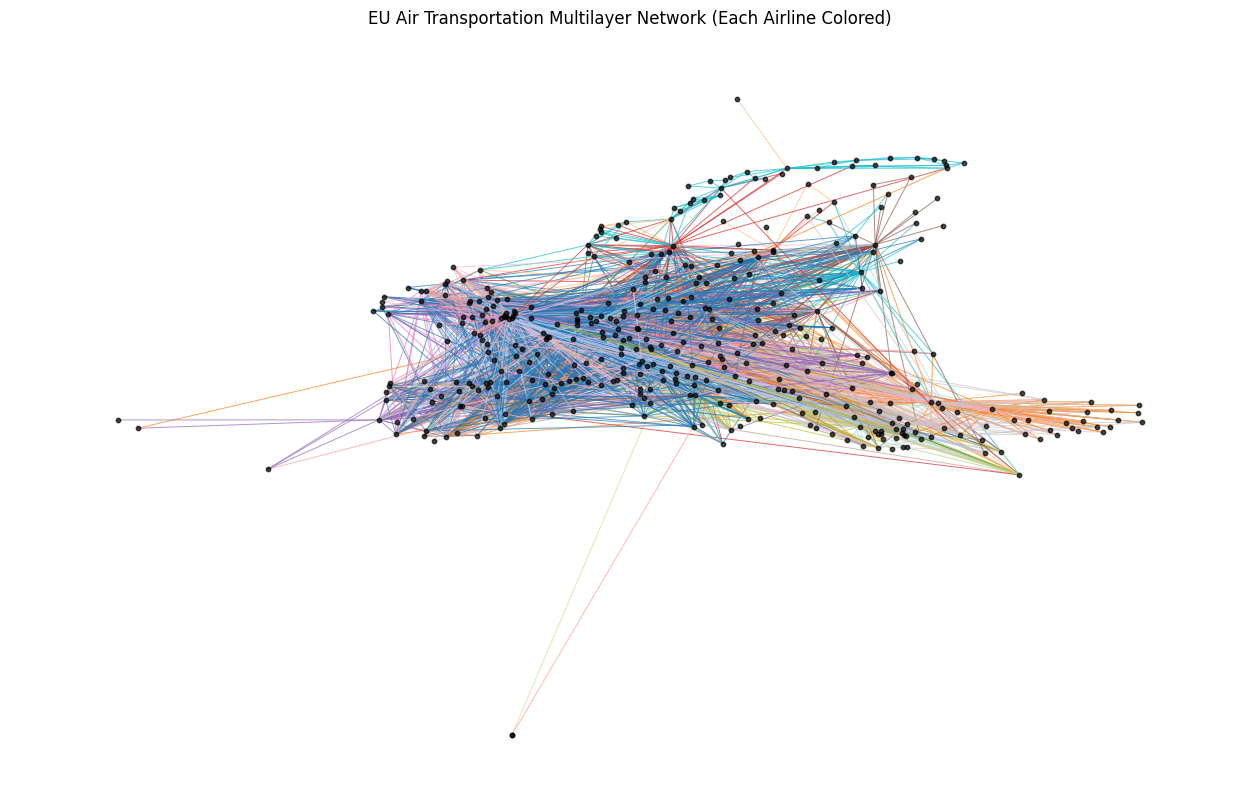

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

file_path = '../data'

# Read node positions
node_pos = {}
with open(f"{file_path}//EU_Air//EUAirTransportation_nodes.txt", "r") as f:
    next(f)
    for line in f:
        parts = line.strip().split()
        node_id = parts[0]
        lon = float(parts[-2])
        lat = float(parts[-1])
        node_pos[node_id] = (lon, lat)

# Parse edges by layer
layer_edges = {}
with open(f"{file_path}//EU_Air//EUAirTransportation_multiplex.edges", "r") as f:
    for line in f:
        parts = line.strip().split()
        layer = parts[0]
        node1 = parts[1]
        node2 = parts[2]
        layer_edges.setdefault(layer, []).append((node1, node2))

# Create a combined graph for all layers
G = nx.Graph()
for layer, edges in layer_edges.items():
    G.add_edges_from(edges, layer=layer)

# Assign a color to each layer
layers = sorted(layer_edges.keys(), key=int)
colors_map = cm.get_cmap('tab20', len(layers))
layer_colors = {layer: colors_map(i) for i, layer in enumerate(layers)}

# Get a list of edges with their colors
edge_colors = [layer_colors[G.edges[u, v]['layer']] for u, v in G.edges()]

# Draw the graph
fig, ax = plt.subplots(figsize=(16, 10))

# Use the pre-computed node_pos for the layout
nx.draw_networkx(
    G,
    pos=node_pos,
    node_size=10,
    node_color='black',
    edge_color=edge_colors,
    width=0.7,
    alpha=0.7,
    with_labels=False,
    ax=ax 
)

ax.axis('off')
plt.title('EU Air Transportation Multilayer Network (Each Airline Colored)')
plt.show()